In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
data = pd.read_csv('newdata.csv')

In [ ]:
data

,LB,LT,KM,KT,GRS,LKS,lantai_rumah,Harga
0,65.0,72.0,2.0,3.0,1.0,Gading Serpong,1,1250000000
1,28.0,50.0,1.0,2.0,1.0,BSD,1,772000000
2,28.0,50.0,1.0,2.0,1.0,Alam Sutera,1,772000000
3,400.0,360.0,3.0,4.0,2.0,BSD,3,8000000000
4,337.0,220.0,4.0,5.0,3.0,BSD,2,10700000000
...,...,...,...,...,...,...,...,...
5008,303.0,350.0,4.0,4.0,2.0,Alam Sutera,2,9000000000
5009,60.0,72.0,2.0,2.0,1.0,Gading Serpong,1,2100000000
5010,84.0,108.0,2.0,3.0,1.0,BSD,1,1850000000
5011,73.0,77.0,2.0,2.0,1.0,Gading Serpong,1,1950000000


In [ ]:
# Melakukan one-hot encoding pada kolom 'LKS'
datafinal = pd.get_dummies(data, columns=['LKS'])

# Menampilkan data setelah one-hot encoding
print(datafinal)

         LB     LT   KM   KT  GRS  lantai_rumah        Harga  LKS_Alam Sutera  \
0      65.0   72.0  2.0  3.0  1.0             1   1250000000            False   
1      28.0   50.0  1.0  2.0  1.0             1    772000000            False   
2      28.0   50.0  1.0  2.0  1.0             1    772000000             True   
3     400.0  360.0  3.0  4.0  2.0             3   8000000000            False   
4     337.0  220.0  4.0  5.0  3.0             2  10700000000            False   
...     ...    ...  ...  ...  ...           ...          ...              ...   
5008  303.0  350.0  4.0  4.0  2.0             2   9000000000             True   
5009   60.0   72.0  2.0  2.0  1.0             1   2100000000            False   
5010   84.0  108.0  2.0  3.0  1.0             1   1850000000            False   
5011   73.0   77.0  2.0  2.0  1.0             1   1950000000            False   
5012   88.0   84.0  2.0  2.0  1.0             1   2000000000            False   

      LKS_BSD  LKS_Gading S

In [ ]:
# Mengganti nama kolom hasil one-hot encoding
datafinal.rename(columns={'LKS_Alam Sutera': 'Alam Sutera', 'LKS_BSD': 'BSD', 'LKS_Gading Serpong': 'Gading Serpong'}, inplace=True)

# Menggabungkan 'Harga' ke ujung kolom
datafinal = pd.concat([datafinal.drop('Harga', axis=1), datafinal['Harga']], axis=1)

# Menampilkan data setelah perubahan
print(datafinal)

         LB     LT   KM   KT  GRS  lantai_rumah  Alam Sutera    BSD  \
0      65.0   72.0  2.0  3.0  1.0             1        False  False   
1      28.0   50.0  1.0  2.0  1.0             1        False   True   
2      28.0   50.0  1.0  2.0  1.0             1         True  False   
3     400.0  360.0  3.0  4.0  2.0             3        False   True   
4     337.0  220.0  4.0  5.0  3.0             2        False   True   
...     ...    ...  ...  ...  ...           ...          ...    ...   
5008  303.0  350.0  4.0  4.0  2.0             2         True  False   
5009   60.0   72.0  2.0  2.0  1.0             1        False  False   
5010   84.0  108.0  2.0  3.0  1.0             1        False   True   
5011   73.0   77.0  2.0  2.0  1.0             1        False  False   
5012   88.0   84.0  2.0  2.0  1.0             1        False   True   

      Gading Serpong        Harga  
0               True   1250000000  
1              False    772000000  
2              False    772000000  
3  

In [ ]:
datafinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5013 entries, 0 to 5012
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LB              5008 non-null   float64
 1   LT              5012 non-null   float64
 2   KM              4912 non-null   float64
 3   KT              4921 non-null   float64
 4   GRS             3940 non-null   float64
 5   lantai_rumah    5013 non-null   int64  
 6   Alam Sutera     5013 non-null   bool   
 7   BSD             5013 non-null   bool   
 8   Gading Serpong  5013 non-null   bool   
 9   Harga           5013 non-null   int64  
dtypes: bool(3), float64(5), int64(2)
memory usage: 289.0 KB


In [ ]:
datafinal.isnull().sum()

,0
LB,5
LT,1
KM,101
KT,92
GRS,1073
lantai_rumah,0
Alam Sutera,0
BSD,0
Gading Serpong,0
Harga,0


In [ ]:
datafinal.dropna(inplace=True)

In [ ]:
datafinal.isnull().sum()

,0
LB,0
LT,0
KM,0
KT,0
GRS,0
lantai_rumah,0
Alam Sutera,0
BSD,0
Gading Serpong,0
Harga,0


In [ ]:
datafinal = datafinal.astype(int)

# Menampilkan data setelah perubahan
print(datafinal)

       LB   LT  KM  KT  GRS  lantai_rumah  Alam Sutera  BSD  Gading Serpong  \
0      65   72   2   3    1             1            0    0               1   
1      28   50   1   2    1             1            0    1               0   
2      28   50   1   2    1             1            1    0               0   
3     400  360   3   4    2             3            0    1               0   
4     337  220   4   5    3             2            0    1               0   
...   ...  ...  ..  ..  ...           ...          ...  ...             ...   
5008  303  350   4   4    2             2            1    0               0   
5009   60   72   2   2    1             1            0    0               1   
5010   84  108   2   3    1             1            0    1               0   
5011   73   77   2   2    1             1            0    0               1   
5012   88   84   2   2    1             1            0    1               0   

            Harga  
0      1250000000  
1       772

In [ ]:
datafinal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3939 entries, 0 to 5012
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   LB              3939 non-null   int64
 1   LT              3939 non-null   int64
 2   KM              3939 non-null   int64
 3   KT              3939 non-null   int64
 4   GRS             3939 non-null   int64
 5   lantai_rumah    3939 non-null   int64
 6   Alam Sutera     3939 non-null   int64
 7   BSD             3939 non-null   int64
 8   Gading Serpong  3939 non-null   int64
 9   Harga           3939 non-null   int64
dtypes: int64(10)
memory usage: 338.5 KB


In [ ]:
total_alam_sutera = datafinal['Alam Sutera'].sum()
total_bsd = datafinal['BSD'].sum()
total_gading_serpong = datafinal['Gading Serpong'].sum()

print("Total data Alam Sutera:", total_alam_sutera)
print("Total data BSD:", total_bsd)
print("Total data Gading Serpong:", total_gading_serpong)

Total data Alam Sutera: 325
Total data BSD: 2200
Total data Gading Serpong: 1414


In [ ]:
datafinal.describe()

,LB,LT,KM,KT,GRS,lantai_rumah,Alam Sutera,BSD,Gading Serpong,Harga
count,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000,3.939000e+03
mean,210.830922,185.012947,3.046966,3.639502,1.582889,2.107642,0.082508,0.558517,0.358974,4.719541e+09
std,195.992179,162.148986,1.333278,1.345958,0.803700,0.782678,0.275172,0.496627,0.479761,5.210251e+09
min,1.000000,30.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.070000e+08
25%,95.000000,95.000000,2.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.970000e+09
50%,160.000000,144.000000,3.000000,3.000000,1.000000,2.000000,0.000000,1.000000,0.000000,3.100000e+09
75%,250.000000,210.000000,4.000000,4.000000,2.000000,3.000000,0.000000,1.000000,1.000000,5.300000e+09
max,3223.000000,2539.000000,15.000000,22.000000,10.000000,3.000000,1.000000,1.000000,1.000000,6.000000e+10


In [ ]:
cor =datafinal.corr()

<Axes: >

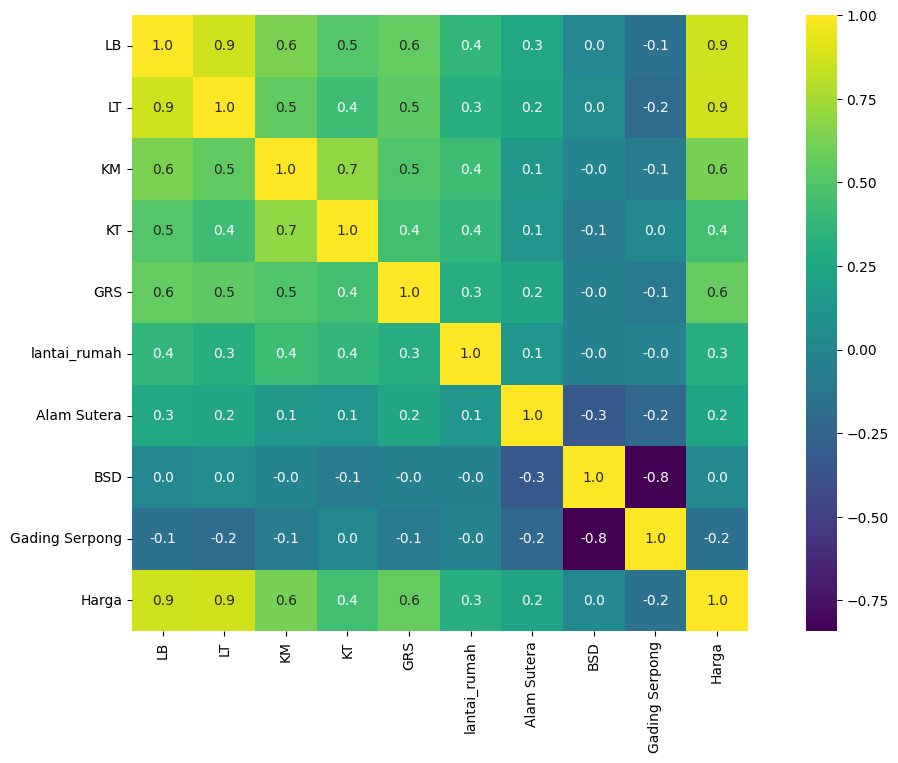

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(cor, cbar=True, square=True, fmt='.1f', annot=True, cmap='viridis')

In [ ]:
print(cor['Harga'])

LB                0.858921
LT                0.868408
KM                0.613998
KT                0.440481
GRS               0.561461
lantai_rumah      0.316240
Alam Sutera       0.230885
BSD               0.022597
Gading Serpong   -0.155818
Harga             1.000000
Name: Harga, dtype: float64


In [ ]:
X = datafinal.drop(['Harga'], axis=1)
Y = datafinal['Harga']

In [ ]:
print(X)

       LB   LT  KM  KT  GRS  lantai_rumah  Alam Sutera  BSD  Gading Serpong
0      65   72   2   3    1             1            0    0               1
1      28   50   1   2    1             1            0    1               0
2      28   50   1   2    1             1            1    0               0
3     400  360   3   4    2             3            0    1               0
4     337  220   4   5    3             2            0    1               0
...   ...  ...  ..  ..  ...           ...          ...  ...             ...
5008  303  350   4   4    2             2            1    0               0
5009   60   72   2   2    1             1            0    0               1
5010   84  108   2   3    1             1            0    1               0
5011   73   77   2   2    1             1            0    0               1
5012   88   84   2   2    1             1            0    1               0

[3939 rows x 9 columns]


In [ ]:
print(Y)

0        1250000000
1         772000000
2         772000000
3        8000000000
4       10700000000
           ...     
5008     9000000000
5009     2100000000
5010     1850000000
5011     1950000000
5012     2000000000
Name: Harga, Length: 3939, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=2)

In [ ]:
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=2)

In [ ]:
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[1.67923149e+09 2.98450823e+09 8.82620000e+09 4.34520000e+09
 2.78970000e+09 4.80000000e+09 4.47965000e+09 2.40000000e+09
 1.38204864e+09 6.76566667e+08 4.81862500e+09 1.65000000e+10
 1.38204864e+09 2.72206667e+09 2.40546183e+09 3.09550000e+09
 1.95606150e+09 7.64060000e+08 3.56140000e+09 6.60630000e+09
 1.80796922e+09 2.85004667e+09 1.31868976e+09 1.65156667e+09
 2.21485917e+09 2.19080000e+09 1.14471160e+09 2.36258176e+09
 2.33544976e+09 9.57787202e+09 9.27441667e+09 3.40170000e+09
 2.36500000e+10 2.16655000e+10 1.97074954e+09 3.06423333e+09
 2.59241944e+09 1.17550349e+09 1.26825097e+09 5.27000000e+09
 7.35380977e+09 6.48875000e+09 3.15953333e+09 1.48370000e+09
 1.21170000e+10 5.23590000e+09 5.82882500e+09 5.16473333e+09
 2.20371333e+09 2.20310000e+09 1.64905000e+10 4.66600000e+09
 2.29175000e+10 1.38204864e+09 1.50539049e+09 3.26330000e+09
 1.01795000e+10 4.06943813e+09 3.05533333e+09 7.20195000e+09
 2.42287500e+09 2.38766667e+09 2.83550000e+09 5.27000000e+09
 4.21940000e+09 2.458300

In [ ]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R square Score: ", error_score)

R square Score:  0.9184199514410833


In [ ]:
print(Y_test.head(10))

4076    1850000000
4328    2900000000
2494    6500000000
3513    3300000000
181     2360000000
5002    4800000000
3036    5300000000
4362    2400000000
4227    1370000000
1826     590000000
Name: Harga, dtype: int64


In [ ]:
print(X_test.head(10))

       LB   LT  KM  KT  GRS  lantai_rumah  Alam Sutera  BSD  Gading Serpong
4076   70  112   1   2    1             1            0    1               0
4328  142  120   3   3    1             2            0    1               0
2494  450  300   3   4    2             3            1    0               0
3513  250  175   3   3    5             2            0    1               0
181   140  216   3   4    1             3            0    0               1
5002  155  128   2   4    1             2            0    0               1
3036  250  135   4   4    2             3            0    1               0
4362   82   84   2   3    1             1            0    1               0
4227   69   69   2   3    1             1            0    0               1
1826   75   82   1   2    1             1            0    1               0


In [ ]:
Y_test = list(Y_test)

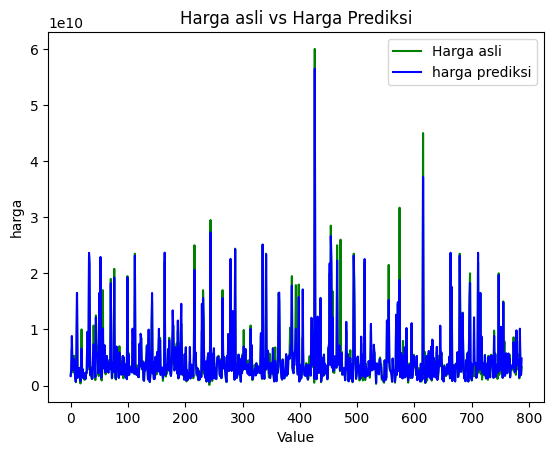

In [ ]:
plt.plot(Y_test, color='green', label='Harga asli')
plt.plot(test_data_prediction, color='blue', label='harga prediksi')
plt.title('Harga asli vs Harga Prediksi')
plt.xlabel('Value')
plt.ylabel('harga')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Feature Importance')

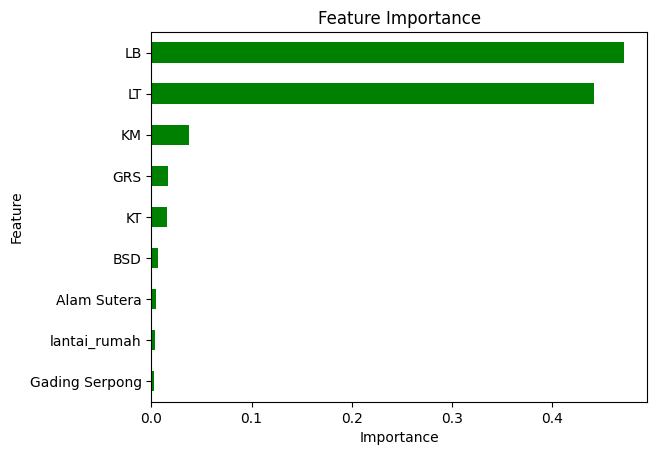

In [ ]:
global_importances = pd.Series(model.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
# Menghitung MAE
mae = mean_absolute_error(Y_test, test_data_prediction)
print(f"Mean Absolute Error (MAE): {mae}")

# Menghitung MAPE
mape = mean_absolute_percentage_error(Y_test, test_data_prediction)
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")

Mean Absolute Error (MAE): 606471383.8070618
Mean Absolute Percentage Error (MAPE): 14.81%


In [ ]:
# input data untuk prediksi, masukan nilai 1 pada bagian pilihan lokasi antara
# alam sutera, bsd, dan gading serpong. masukan 0 pada lokasi yang tidak dipilih

new_data = pd.DataFrame({
    'LB': [180],
    'LT': [150],
    'KM': [2],
    'KT': [2],
    'GRS': [1],
    'lantai_rumah':[3],
    'Alam Sutera': [1],
    'BSD': [0],
    'Gading Serpong': [0]
})

# prediksi menggunakan model yang sudah dilatih
predicted_price = model.predict(new_data)

predicted_price = "Rp {:,.0f}".format(predicted_price[0])

print("Harga prediksi:", predicted_price)

Harga prediksi: Rp 3,647,466,667


In [ ]:
# import numpy as np

# # Mengonversi array ke satu dimensi
# Y_test_flat = Y_test.values.ravel()
# test_data_prediction_flat = test_data_prediction.ravel()

# # Mencari indeks di mana nilai sama
# indices = np.where(Y_test_flat == test_data_prediction_flat)[0]

# # Menampilkan nilai yang sama dengan jarak yang diatur
# for idx in indices:
#     print("Data Sebenarnya: ", format_as_rupiah(Y_test_flat[idx]), " Data Prediksi: ", format_as_rupiah(test_data_prediction_flat[idx]))
#     print("-" * 40)  # Baris putus setelah setiap hasil cetakan

In [ ]:
import joblib

joblib.dump(model, 'modelfix.joblib')

['modelfix.joblib']

In [ ]:
# # Simpan ke file CSV (membutuhkan library 'csv')
# import csv

# with open('results.csv', 'w', newline='') as csvfile:
#     writer = csv.writer(csvfile)
#     writer.writerow(['R-squared', 'MAE', 'MAPE'])
#     writer.writerow([error_score, mae, mape_value])

# # Simpan ke file JSON (membutuhkan library 'json')
# import json

# data = {'R-squared': error_score, 'MAE': mae, 'MAPE': mape_value}
# with open('results.json', 'w') as outfile:
#     json.dump(data, outfile)

In [ ]:
!pip install scikit-learn==1.5.1 joblib==1.4.2

In [ ]:
import sklearn
print(sklearn.__version__)

1.5.1
